The von-neumann master equation is comprised of the density matrix formalism, which for a two level system churns out four time dependent differential equations. Each of these corroborate to a physical meaning to the system. 
Let the density matrix elements be $\rho_{gg}$, $\rho_{ee}$, $\rho_{eg}$ and $\rho_{ge}$, wherein $e,g$ are the exicted and ground state respectively. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def equations(rho11, rho12, rho21, rho22):
  rho22= 1-rho11
  rho12dt = 1j*(delta)*rho12 - 1j*(omega/2)*(rho22-rho11)
  rho21dt = -1j*(delta)*rho12 - 1j*(omega/2)*(rho11-rho22)
  rho11dt = -1j*(omega/2)*(rho21-rho12)
  rho22dt = 1j*(omega/2)*(rho21-rho12)
  return [rho11dt, rho22dt, rho12dt, rho21dt]

In [ ]:
delta = 2*np.pi*1*1e6
omega = 2*np.pi*1*1e6
rho0=[1,0,0,0]

The four equations are : \\
$\partial_t \rho_{ee}= i \frac{\Omega}{2} [\rho_{eg}-\rho_{ge}]$ \\
$\partial_t \rho_{gg}= -i \frac{\Omega}{2} [\rho_{eg}-\rho_{ge}]$ \\
$\partial_t \rho_{eg}= i\Delta \rho_{eg}+i \frac{\Omega}{2} [\rho_{ee}-\rho_{gg}]$ \\
$\partial_t \rho_{ge}= -i\Delta \rho_{ge}-i \frac{\Omega}{2} [\rho_{ee}-\rho_{gg}]$ \\

In [ ]:
def rho(t, n):
  
  rho11_val = rho0[0]
  rho22_val = rho0[1]
  rho12_val = rho0[2]
  rho21_val = rho0[3]
 # using euler's rule for integration which is nothing but the rk method itself
  h = t/n #grid

  for n in np.linspace(0, n, (n+1)):
    rho11_val = rho11_val + h * equations(rho11_val, rho12_val, rho21_val, rho22_val)[0]
    rho22_val = rho22_val + h * equations(rho11_val, rho12_val, rho21_val, rho22_val)[1]
    rho12_val = rho12_val + h * equations(rho11_val, rho12_val, rho21_val, rho22_val)[2]
    rho21_val = rho21_val + h * equations(rho11_val, rho12_val, rho21_val, rho22_val)[3]

  return[rho11_val, rho22_val, rho12_val, rho21_val]

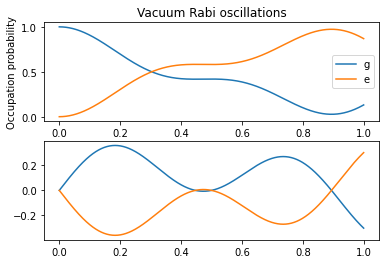

In [ ]:
fig, ax = plt.subplots(2)

#first plot
ax[0].plot(np.linspace(0,1,1000), rho(np.linspace(0,1,1000)*1e-6, 10000)[0].real, label='g')
ax[0].plot(np.linspace(0,1,1000), rho(np.linspace(0,1,1000)*1e-6, 10000)[1].real, label='e')

ax[0].legend()
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Occupation probability')
ax[0].set_title('Vacuum Rabi oscillations')

#second plot
ax[1].plot(np.linspace(0,1,1000), rho(np.linspace(0,1,1000)*1e-6, 10000)[2].imag)
ax[1].plot(np.linspace(0,1,1000), rho(np.linspace(0,1,1000)*1e-6, 10000)[3].imag)


